In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class Sigmoid_Neuron():
    
    def __init__(self):
        self.w=None
        self.b=None
        
    def perceptron(self,x):
        return (np.dot(x,self.w.T)+self.b)
    
    def sigmoid(self,formula):
        return 1.0/(1.0+np.exp(-formula))
    
    def grad_w(self,X,Y):
        y_pred=self.sigmoid(self.perceptron(X))
        return (y_pred-Y)*y_pred*(1-y_pred)*X
    
    def grad_b(self,X,Y):
        y_pred=self.sigmoid(self.perceptron(X))
        return (y_pred-Y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True):
        #initialise w and b
        
        self.w=np.random.randn(1,X.shape[1])
        self.b=0
        
        for i in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-=learning_rate*dw
            self.b-=learning_rate*db

# Normal Test Data

In [31]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=np.asarray([1,1,1,0,0,0])
print(X.shape,Y.shape)

(6, 2) (6,)


In [32]:
sn=Sigmoid_Neuron()
sn.fit(X,Y,1,0.25,True)
print(sn.w,sn.b)

[[-1.7075388  -0.39282798]] [0.03406857]


# Toy Data Plot 1/2

In [33]:
import matplotlib
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [34]:
def plot_sn(X,Y,sn,ax):
    x1=np.linspace(-10,10,100)
    x2=np.linspace(-10,10,100)
    xx1,xx2=np.meshgrid(x1,x2)
    YY=np.zeros(xx1.shape)
    for i in range(x2.size):
        for j in range(x1.size):
            val=np.asarray([x1[j],x2[i]])
            YY[i,j]=sn.sigmoid(sn.perceptron(val))
    ax.contourf(xx1,xx2,YY,cmap=my_cmap,alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    ax.plot()

[[-0.39900847 -0.25173714]] [0.00246618]
[[ 2.34355576 -0.85584344]] [-0.00259356]
[[1.6407463  2.03959921]] [-0.00025639]
[[ 0.72549998 -1.58442661]] [0.00368267]
[[-0.13175564  0.04433019]] [0.00095647]
[[-0.69803882  0.29272174]] [-0.00382956]
[[-0.20416262 -0.66567904]] [0.00321063]
[[0.25714805 0.01781954]] [-0.00186713]
[[-1.63690029 -0.75983626]] [0.00094067]
[[ 0.87207039 -0.38303056]] [-0.00565794]
[[ 1.51685451 -0.98716877]] [-0.00500843]
[[-1.24062125 -0.58036873]] [0.00115567]
[[-0.4220941   0.58431076]] [0.00204217]
[[2.58555666 1.77540332]] [0.00052322]
[[ 0.94413883 -1.05619499]] [0.0039881]
[[-0.66266063 -0.31562432]] [0.0019891]
[[-1.12941284 -0.40027273]] [0.00327726]
[[-0.965347    1.38937314]] [0.00225895]
[[-2.17630007  0.03610517]] [0.00227579]
[[-0.27607306  0.09625885]] [9.85316418e-05]
[[0.26715365 0.33755436]] [0.00186702]
[[0.12605982 0.10900866]] [0.00051364]
[[-0.51498901  0.92658066]] [0.00180344]
[[-0.06654024  0.2032729 ]] [0.00164506]
[[0.05848304 0.165

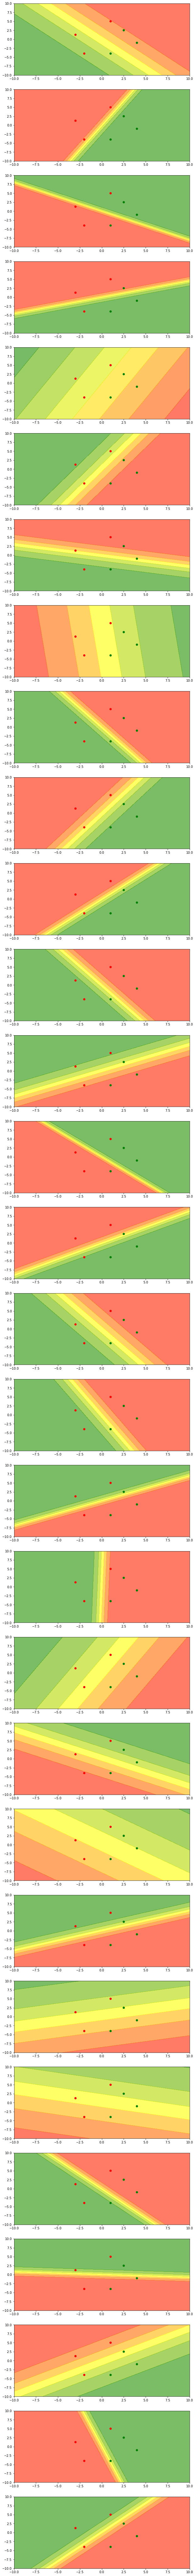

In [36]:
sn.fit(X,Y,1,0.05,True)
N=30
plt.figure(figsize=(10,N*5))
for i in range(N):
    print(sn.w,sn.b)
    ax=plt.subplot(N,1,i+1)
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.5,False)
    